<a href="https://colab.research.google.com/github/Rinkachirikiari/hello-world-/blob/main/Projet_Python_PREMAOR__REZZOUK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importation des données 
import pandas as pd
import numpy as np

df = pd.read_csv('drug_consumption.data', sep=",",header=None)

print(df)


In [ ]:
df_vierge = pd.read_csv('drug_consumption.data', sep=",",header=None)
df_vierge=df_vierge.rename(columns={0:'ID',1:'Age',2:'Gender',3:'Education',4:'Country',5:'Ethnicity',6:'Nscore',7:'Escore',8:'Oscore',9:'Ascore',10:'Cscore',11:'Impulsive',12:'SS',13:'Alcohol',14:'Amphet',15:'Amyl',16:'Benzos',17:'Caff',18:'Cannabis',19:'Choc',20:'Coke',21:'Crack',22:'Ecstasy',23:'Heroin',24:'Ketamine',25:'Legalh',26:'LSD',27:'Meth',28:'Mushrooms',29:'Nicotine',30:'Semer',31:'VSA'})
df_vierge=df_vierge.drop(columns=['ID'])

# EDA

In [ ]:
# Re-définition des colonnes et des données
df=df.rename(columns={0:'ID',1:'Age',2:'Gender',3:'Education',4:'Country',5:'Ethnicity',6:'Nscore',7:'Escore',8:'Oscore',9:'Ascore',10:'Cscore',11:'Impulsive',12:'SS',13:'Alcohol',14:'Amphet',15:'Amyl',16:'Benzos',17:'Caff',18:'Cannabis',19:'Choc',20:'Coke',21:'Crack',22:'Ecstasy',23:'Heroin',24:'Ketamine',25:'Legalh',26:'LSD',27:'Meth',28:'Mushrooms',29:'Nicotine',30:'Semer',31:'VSA'})

#On regarde si il y'a des 'null' dans les données 
df.isna().sum()

# L'ID n'a pas d'intérêt ici, l'indexation est suffisante
df=df.drop(columns=['ID'])


In [ ]:
#Gender remise en forme
func=lambda x : 'M' if (x>0) else 'F'
df['Gender'] = df['Gender'].apply(func)

In [ ]:
#Education remise en forme 
def Educ(x):
  if x<-1:
    x='Left school before 18 years old'   # On a fait le choix de regrouper toutes les personnes ayant arrêté leur scolarité avant 18 ans 
  elif x==-0.61113:
    x='At college or university, no degree'
  elif x==-0.05921:
    x='Professional diploma'
  elif x==0.45468:
    x='University degree'
  elif x==1.16365:
    x='Master degree'
  else:
    x='Doctor degree'
  return(x)

#On affiche les valeurs pour constater un problème de décimal ! 
def affichage(x):
  for x in df.iloc[:,x]:
    print(x)

#on arrondit donc les valeurs !
Round= lambda x : round(x,5)
df['Education']=df['Education'].apply(Round)

#Applique les changements
df['Education']=df['Education'].apply( lambda x : Educ(x))




In [ ]:
#THIBO

import random

df['Age']=round(df['Age'],5)

def Age(valeur):
  if(valeur==-0.95197):
    valeur=random.randint(18,24)
  elif(valeur==-0.07854):
    valeur=random.randint(25,34)
  elif(valeur==0.49788):
    valeur=random.randint(35,44)
  elif(valeur==1.09449):
    valeur=random.randint(45,54)
  elif(valeur==1.82213):
    valeur=random.randint(55,64)
  else:
    valeur=random.randint(65,85)
  return valeur

df['Age']=df['Age'].apply(Age)


In [ ]:
#Country remise en forme
def Arr(nombre): 
  return np.round(nombre, decimals = 5)

df['Country']=df['Country'].apply(Arr)

def Country(valeur):
  if(valeur==-0.09765):
    valeur="Australia"
  elif(valeur==0.24923):
    valeur="Canada"
  elif(valeur==-0.46841):
    valeur="New Zealand"
  elif(valeur==-0.28519):
    valeur="Other"
  elif(valeur==0.21128):
    valeur="Republic of Ireland"
  elif(valeur==0.96082):
    valeur="UK"
  else:
    valeur="USA"
  return valeur
  
df['Country']=df['Country'].apply(Country)

In [ ]:
#On interprète les CL0, CL1, CL2 ...

def Frequancy(x):
  if x=='CL0':
    x='Never used'
  elif x=='CL1':
    x='More than a decade'
  elif x=='CL2':
    x='A decade'
  elif x=='CL3':
    x='A year'
  elif x=='CL4':
    x='A month'
  elif x=='CL5':
    x='A week'
  elif x=='CL6':
    x='A day'
  else:
    x=="ERROR"
  return(x)

for STR in df.iloc[:,12:31] :
  for x in df[STR]:
    df[STR]=df[STR].apply( lambda x : Frequancy(x))


In [ ]:
#Ethnicity remise en forme

df['Ethnicity']=df['Ethnicity'].apply(Arr)

def Ethnic(valeur):
  if(valeur==-0.50212):
    valeur="Asian"
  elif(valeur==-1.10702):
    valeur="Black"
  elif(valeur==1.90725):
    valeur="Mixed-Black/Asian"
  elif(valeur==0.12600):
    valeur="Mixed-White/Asian"
  elif(valeur==-0.22166):
    valeur="Mixed-White/Black"
  elif(valeur==0.11440):
    valeur="Other"
  else:
    valeur="White"
  return valeur
df['Ethnicity']=df['Ethnicity'].apply(Ethnic)


# VISUALIZATION 

## General Drug Use 

In [ ]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Distrubution du genre des personnes du dataset
#ax = sns.countplot(df.Gender,label="Count") 
#df.Gender.value_counts()

drogues=df.iloc[:,12:30]
def Drogue():
  for x in drogues:
    print(x)

drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Cannabis','Coke', 
        'Crack', 'Ecstasy', 'Heroin', 'Ketamine','Legalh', 
        'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer','VSA']


In [ ]:
#Information générale sur les sujets 
sns.set(style = 'whitegrid')  
  
sns.stripplot(y="Age",x="Gender",hue='Ethnicity', data=df) # Majority of white people


In [ ]:
sns.stripplot(x='Age',y='Education',hue='Gender',data=df)

In [ ]:
# Distribution des différentes drogues 
sns.countplot(y=df.Alcohol,label='Count')
sns.countplot(y=df.Amphet,label='Count')
sns.countplot(y=df.Benzos,label='Count')
sns.countplot(y=df.Caff,label='Count')
sns.countplot(y=df.Cannabis,label='Count')
sns.countplot(y=df.Choc,label='Count')
sns.countplot(y=df.Coke,label='Count')
sns.countplot(y=df.Ecstasy,label='Count')
sns.countplot(y=df.Heroin,label='Count')
sns.countplot(y=df.Ketamine,label='Count')
sns.countplot(y=df.Legalh,label='Count')
sns.countplot(y=df.LSD,label='Count')
sns.countplot(y=df.Meth,label='Count')
sns.countplot(y=df.Mushrooms,label='Count')
sns.countplot(y=df.Nicotine,label='Count')
sns.countplot(y=df.Semer,label='Count')
sns.countplot(y=df.VSA,label='Count')

In [ ]:
# Distribution des différentes drogues en fonction de l'âge

#Alcohol
sns.stripplot(y="Alcohol", x="Age",hue='Gender', data=df)

In [ ]:
#Meth
sns.stripplot(y="Meth", x="Age",hue='Gender', data=df)


In [ ]:
#Amphet
sns.stripplot(y="Amphet", x="Age",hue='Gender', data=df)


In [ ]:
#Amyl
sns.stripplot(y="Amyl", x="Age",hue='Gender', data=df)


In [ ]:
#Benzos
sns.stripplot(y="Benzos", x="Age",hue='Gender', data=df)


In [ ]:
#Caff
sns.stripplot(y="Caff", x="Age",hue='Gender', data=df)


In [ ]:
#Choc
sns.stripplot(y="Choc", x="Age",hue='Gender', data=df)


In [ ]:
#Cannabis
sns.stripplot(y="Cannabis", x="Age",hue='Gender', data=df)


In [ ]:
#Coke
sns.stripplot(y="Coke", x="Age",hue='Gender', data=df)


In [ ]:
#Crack
sns.stripplot(y="Crack", x="Age",hue='Gender', data=df)


In [ ]:
#Ecstasy
sns.stripplot(y="Ecstasy", x="Age",hue='Gender', data=df)


In [ ]:
#Heroin
sns.stripplot(y="Heroin", x="Age",hue='Gender', data=df)


In [ ]:
#Ketamine
sns.stripplot(y="Ketamine", x="Age",hue='Gender', data=df)


In [ ]:
#Legalh
sns.stripplot(y="Legalh", x="Age",hue='Gender', data=df)


In [ ]:
#Nicotine
sns.stripplot(y="Nicotine", x="Age",hue='Gender', data=df)


In [ ]:
#LSD
sns.stripplot(y="LSD", x="Age",hue='Gender', data=df)


In [ ]:
#Mushrooms
sns.stripplot(y="Mushrooms", x="Age",hue='Gender', data=df)


In [ ]:
#Semer
sns.stripplot(y="Semer", x="Age",hue='Gender', data=df)


In [ ]:
#VSA
sns.stripplot(y="VSA", x="Age",hue='Gender', data=df)


In [ ]:
#creation of a world map
pip install folium

In [ ]:
import folium
world_map = folium.Map()

In [ ]:
datfra= pd.DataFrame(columns=['CountryName','Percentage'])
datfra.loc[0]=[ 'United Kingdom',df['Country'].value_counts()[0]/len(df)]
datfra.loc[1]=[ 'United States',df['Country'].value_counts()[1]/len(df)]
datfra.loc[2]=[ 'Canada',df['Country'].value_counts()[3]/len(df)]
datfra.loc[3]=[ 'Australia',df['Country'].value_counts()[4]/len(df)]
datfra.loc[5]=[ 'Ireland',df['Country'].value_counts()[5]/len(df)]
datfra.loc[6]=[ 'New Zealand',df['Country'].value_counts()[6]/len(df)]
datfra

In [ ]:
pip install pycountry-convert

In [ ]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [ ]:
datfra['codes']=datfra['CountryName'].apply(lambda x: get_continent(x))
datfra['Country']=datfra['CountryName'].apply(lambda x: get_continent(x)[0])
datfra['Continent']=datfra['CountryName'].apply(lambda x: get_continent(x)[1])
datfra

In [ ]:
pip install geopy

In [ ]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim()
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [ ]:
datfra['Geolocate']=datfra['Country'].apply(lambda x: geolocate(x))
datfra['Latitude']=datfra['Country'].apply(lambda x: geolocate(x)[0])
datfra['Longitude']=datfra['Country'].apply(lambda x: geolocate(x)[1])
datfra

In [ ]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(datfra)):
        lat = datfra.iloc[i]['Latitude']
        long = datfra.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(datfra.iloc[i]['Country'],
                                   datfra.iloc[i]['Percentage']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

In [ ]:
world_map

## Legal Drug Use

In [ ]:
#Numerical vs Numerical
#We will work with numerical values for now on 

def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL4':
        return 5
    elif x == 'CL5':
        return 6
    else:
        return 7

for column in drugs:
    df_vierge[column] = df_vierge[column].apply(drug_encoder)


legal_df = df_vierge[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 
                 'Nscore','Escore','Oscore', 'Ascore','Cscore',
                 'Impulsive','SS','Alcohol','Nicotine', 'Benzos']]

df_vierge.head()


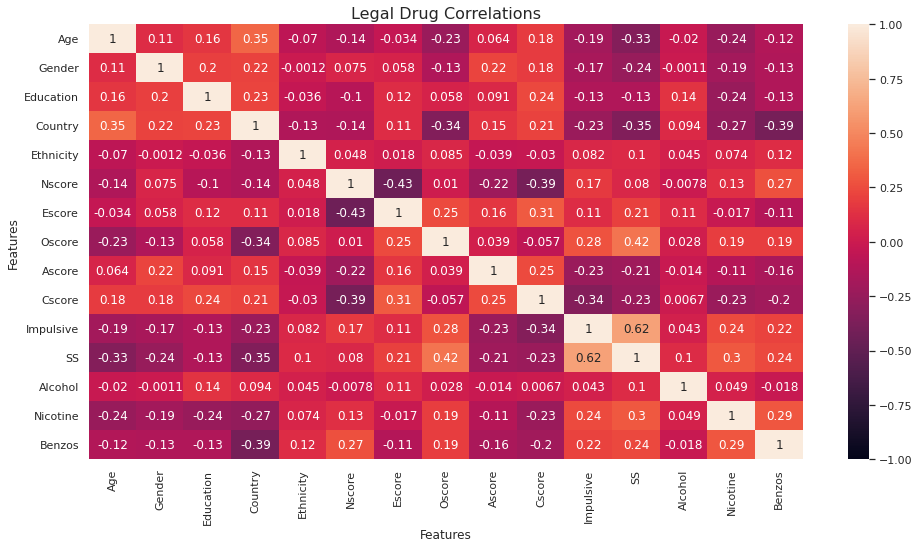

In [ ]:
# Matrice de correlation for legal drugs
corr = legal_df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Legal Drug Correlations', size=16)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

### Alcohol

Text(0.5, 1.03, 'Ethnicity vs Alcohol')

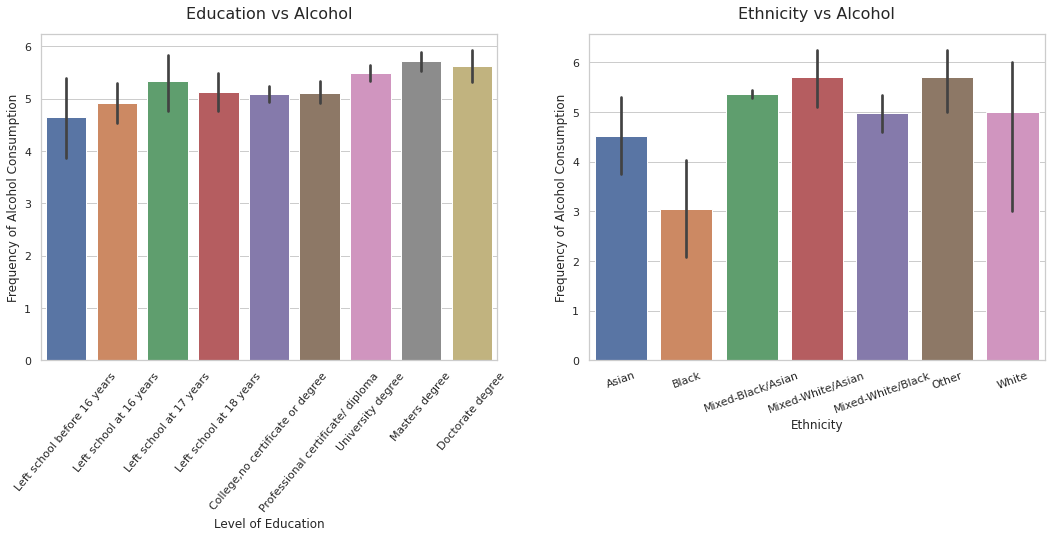

In [ ]:
#Alcohol in society 
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ethnicities = ['Asian','Black','Mixed-Black/Asian','Mixed-White/Asian','Mixed-White/Black','Other','White']
education =["Left school before 16 years","Left school at 16 years","Left school at 17 years","Left school at 18 years","College,no certificate or degree","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"]
sns.set_style('whitegrid')
sns.barplot(data=legal_df, x='Education', y='Alcohol', ax=ax1)
sns.barplot(data=legal_df, x='Ethnicity', y='Alcohol', ax=ax2)
ax1.set(xlabel='Level of Education', ylabel='Frequency of Alcohol Consumption')
ax2.set(xlabel='Ethnicity', ylabel='Frequency of Alcohol Consumption')
ax2.set_xticklabels(labels=ethnicities, rotation=20)
ax1.set_xticklabels(labels=education,rotation=50)
ax1.set_title('Education vs Alcohol', y=1.03, fontsize=16)   
ax2.set_title('Ethnicity vs Alcohol', y=1.03, fontsize=16) 

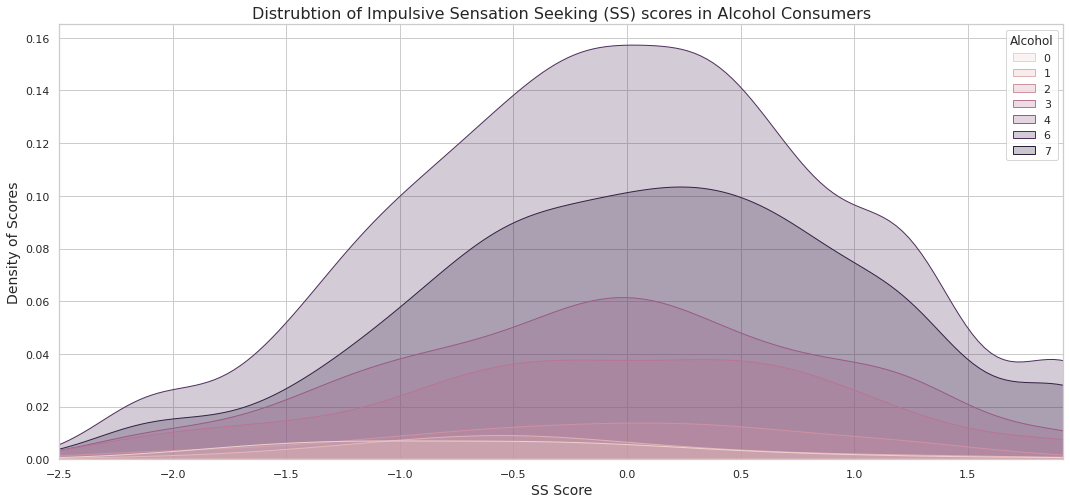

In [ ]:
plt.figure(figsize=(18,8))
sns.kdeplot(x='SS', shade=True, hue='Alcohol', data=legal_df)
plt.title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Alcohol Consumers', size=16)
plt.xlim(-2.5, df['SS'].max())
plt.xlabel('SS Score', size=14)
plt.ylabel('Density of Scores', size=14)
plt.show()

### Nicotine

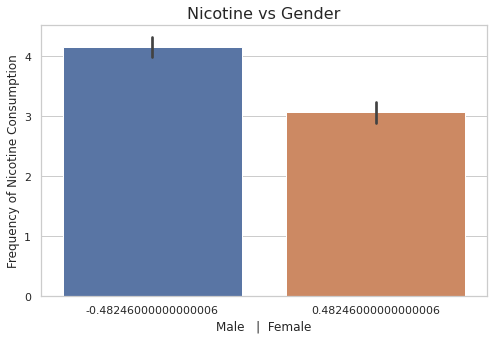

In [ ]:
#Nicotine and Gender
plt.figure(figsize=(8,5))
sns.barplot(data=legal_df, x='Gender', y='Nicotine')
plt.title('Nicotine vs Gender', size=16)
plt.xlabel('Male   |  Female', size=12)
plt.ylabel('Frequency of Nicotine Consumption', size=12)
plt.show()

In [ ]:
#Nicotine in society 
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ethnicities = ['Asian','Black','Mixed-Black/Asian','Mixed-White/Asian','Mixed-White/Black','Other','White']
education =["Left school before 16 years","Left school at 16 years","Left school at 17 years","Left school at 18 years","College,no certificate or degree","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"]
sns.set_style('whitegrid')
sns.barplot(data=legal_df, x='Education', y='Nicotine', ax=ax1)
sns.barplot(data=legal_df, x='Ethnicity', y='Nicotine', ax=ax2)
ax1.set(xlabel='Level of Education', ylabel='Frequency of Nicotine Consumption')
ax2.set(xlabel='Ethnicity', ylabel='Frequency of Nicotine Consumption')
ax2.set_xticklabels(labels=ethnicities, rotation=20)
ax1.set_xticklabels(labels=education,rotation=50)
ax1.set_title('Education vs Nicotine', y=1.03, fontsize=16)   
ax2.set_title('Ethnicity vs Nicotine', y=1.03, fontsize=16) 

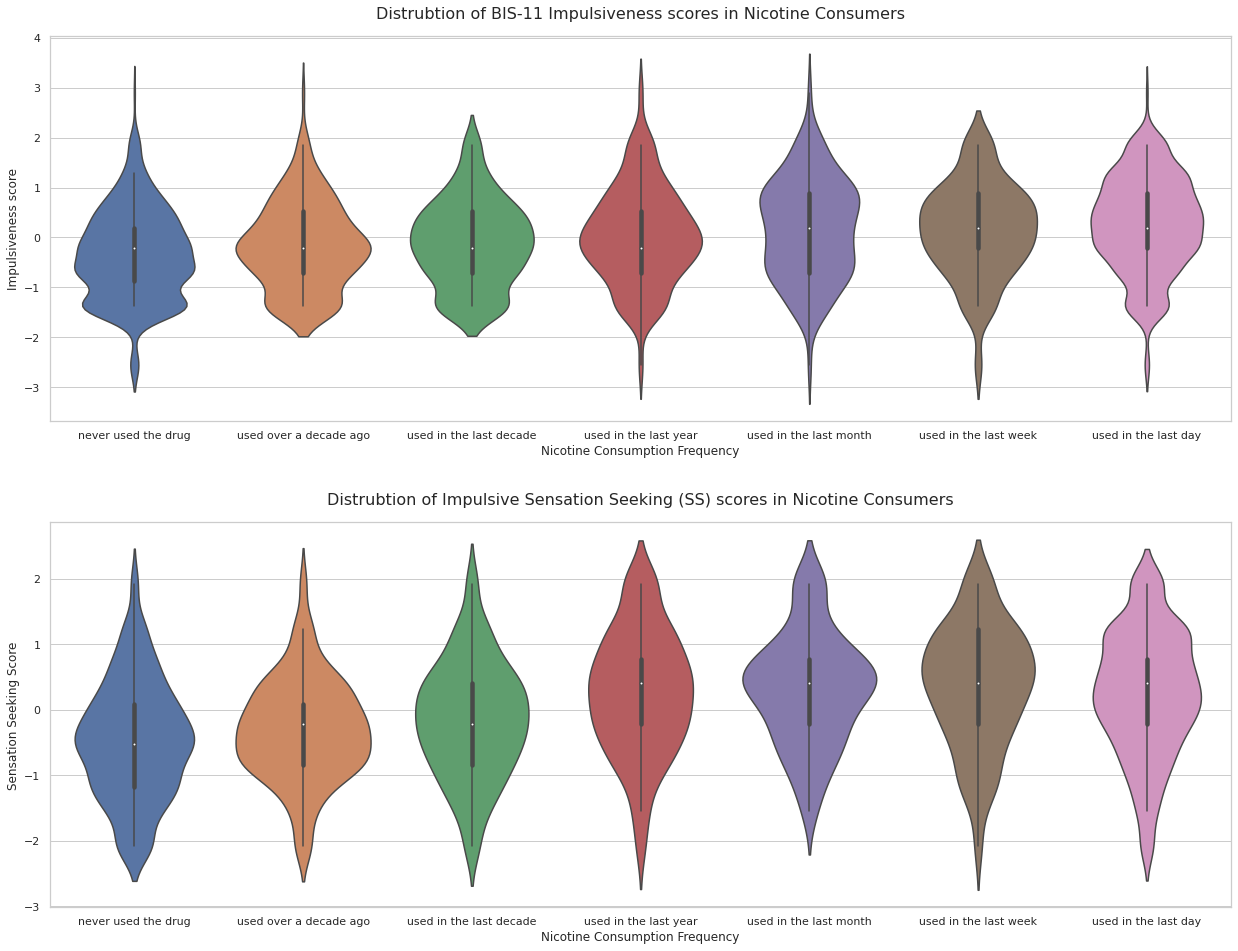

In [ ]:
#Nicotine effect on the behaviour
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Nicotine', y='Impulsive', data=legal_df, ax=ax1)
sns.violinplot(x='Nicotine', y='SS', data=legal_df, ax=ax2)
ax1.set(xlabel = 'Nicotine Consumption Frequency', ylabel = 'Impulsiveness score')
ax2.set(xlabel = 'Nicotine Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of BIS-11 Impulsiveness scores in Nicotine Consumers', y=1.03, fontsize=16)   
ax2.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Nicotine Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



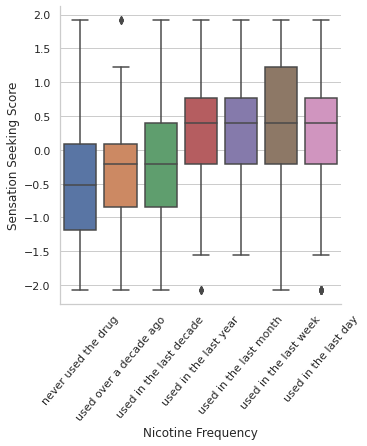

In [ ]:
#Barplot visualization
g = sns.factorplot("Nicotine","SS", data=legal_df, kind="box")
g.set_axis_labels("Nicotine Frequency", "Sensation Seeking Score")
g.set_xticklabels(labels=frequency,rotation=50)


### Benzodiazepines

In [ ]:
#Neuroticism | Impulsiveness | Sensation Seeking Score linked to the Benzodiazepines Comsumption Frequency
f, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(18, 18))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Benzos', y='Nscore',  data=legal_df,palette="mako", ax=ax1)
sns.violinplot(x='Benzos', y='Impulsive', data=legal_df,palette='mako', ax=ax2)
sns.violinplot(x='Benzos', y='SS', data=legal_df, palette='mako', ax=ax3)
ax1.set(xlabel = 'Benzodiazepines Consumption Frequency', ylabel = 'Neuroticism score')
ax2.set(xlabel = 'Benzodiazepines Consumption Frequency', ylabel = 'Impulsiveness Score')
ax3.set(xlabel = 'Benzodiazepines Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of NEO Five-Factor Inventory Neuroticism score in Benzodiazepines Consumers', y=1.03, fontsize=16)   
ax2.set_title('Distrubtion of BIS-11 impulsiveness scores in Benzodiazepines Consumers', y=1.03, fontsize=16)
ax3.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Benzodiazepines Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
ax3.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

In [ ]:
# On va créer 3 colonnes en plus dans le dataset pour étudier la corrélation des usagers de nicotine et benzos
both_df = legal_df.copy()
both_df['Nicotine_User'] = both_df['Nicotine'].apply(lambda x: 0.5 if x not in [0,1] else 0)
both_df['Benzos_User'] = both_df['Benzos'].apply(lambda x: 0.5 if x not in [0,1] else 0)
both_df['Both'] = both_df[['Nicotine_User', 'Benzos_User']].iloc[:].sum(axis=1)
both_df.head()

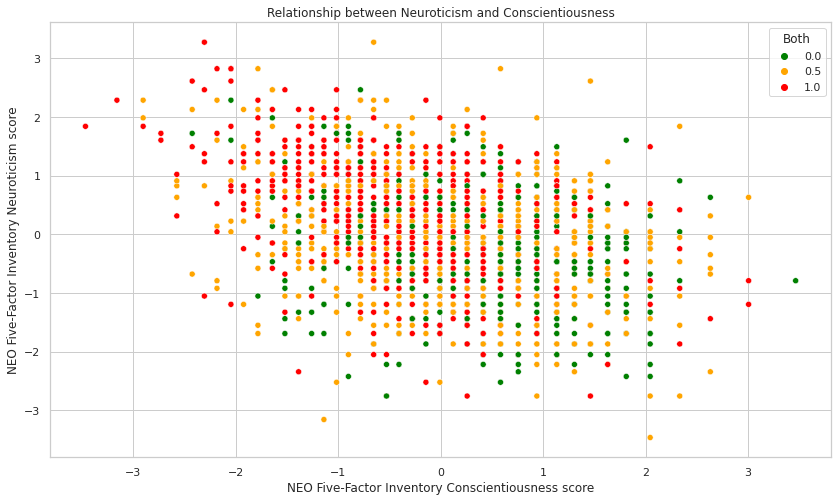

In [ ]:
# 0.0 = non nicotine or benzo consumer
# 0.5 = consumes either drug
# 1.0 = consumes both drugs

plt.figure(figsize=(14,8))
sns.scatterplot(data=both_df, x='Cscore', y='Nscore', hue='Both',palette=['green','orange','red'])
plt.title('Relationship between Neuroticism and Conscientiousness')
plt.xlabel('NEO Five-Factor Inventory Conscientiousness score')
plt.ylabel('NEO Five-Factor Inventory Neuroticism score')
plt.show()

### **Conclusion Legal Drug Use**

1. La consommation d'alcool montre une légère corrélation positive avec 
le niveau d'éducation, de sorte que l'enseignement supérieur est associé à une consommation d'alcool plus fréquente. Plus précisément, ceux qui ont un diplôme universitaire ou supérieur (c'est-à-dire une maîtrise ou un doctorat) ont consommé le plus d'alcool. De plus, les consommateurs fréquents d'alcool avaient tendance à afficher des scores de recherche de sensations impulsives (SS) plus élevés, de sorte qu'une majorité de non-consommateurs (jamais bu ou consommé il y a plus d'une décennie) avaient un score SS proche de -1,0 tandis que les consommateurs fréquents (consommés un il y a une semaine ou un jour) avaient tendance à obtenir un score compris entre 0 et 0,25.

2. Contrairement à l'alcool, la nicotine a montré une différence marquée dans la consommation entre les sexes, les hommes consommant plus de nicotine que les femmes. De plus, la consommation de nicotine était positivement corrélée à la fois avec le score d'impulsivité BIS-11 et le SS. Cependant, cette relation était légèrement plus prononcée dans le SS.

3. Nous avons examiné la relation entre Benzodiazepine et diverses mesures de la personnalité. La fréquence de consommation de benzoïne a montré une corrélation positive avec les scores de névrosisme (Nscore), d'impulsivité et de SS. Cette corrélation était la plus forte dans les Nscores. Ces résultats s'alignent avec d'autres recherches qui ont suggéré une relation entre la sensibilité aux benzodiazépines et le névrosisme avec ceux avec un névrosisme plus élevé montrant une sensibilité plus élevée aux Benzos (Cf publication : https://www.researchgate.net/publication/318204156_The_Five_Factor_Model_of_Personality_and_Evaluation_of_Drug_Consumption_Risk ).

4. Fait intéressant, il existe une forte corrélation négative entre le Nscore et la Conscience (Cscore). Pour mieux comprendre comment cette relation était liée à la consommation de drogue, nous avons examiné la consommation de nicotine et de benzo. Sans surprise, ceux qui consommaient à la fois de la nicotine et du benzo avaient tendance à avoir des Nscores plus élevés et des Cscores inférieurs, tandis que ceux qui n'utilisaient aucune drogue affichaient des Cscores élevés et des Nscores faibles.



## Illegal Drug Use

In [ ]:
illegal_df = df_vierge[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
                   'Escore','Oscore', 'Ascore','Cscore','Impulsive','SS',
                   'Cannabis', 'Legalh', 'Amphet', 'Ecstasy', 'Mushrooms', 'Coke', 'LSD']]
illegal_df.head()

In [ ]:
#Matrice de corrélation des drogues illégales

corr = illegal_df.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Illegal Drug Correlations', size=16)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

### Cannabis

Text(0.5, 1.03, 'Age vs Cannabis')

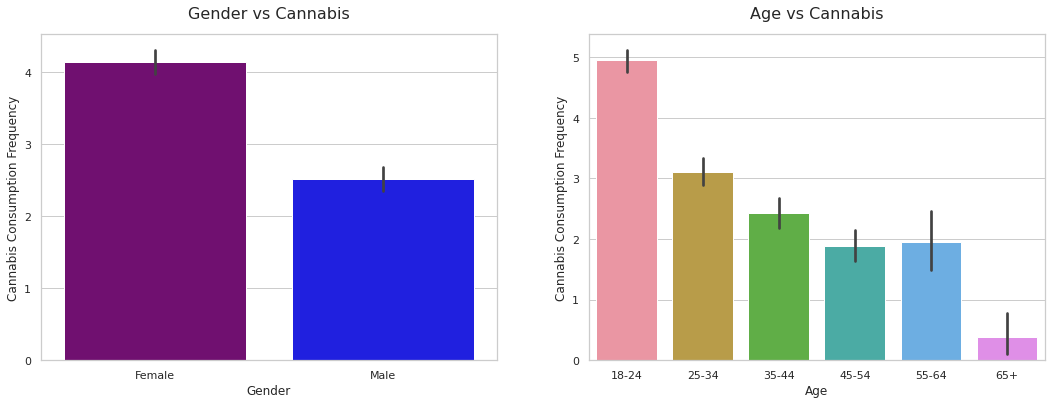

In [ ]:
f,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
genders = ['Female', 'Male']
ages = ['18-24','25-34','35-44','45-54','55-64','65+']
sns.set_style('darkgrid')
custom_palette=['purple','blue']   
sns.set_palette(custom_palette)
sns.barplot(x='Gender', y='Cannabis', data=illegal_df, ax=ax1)    
sns.barplot(x='Age',y='Cannabis', data=illegal_df, ax=ax2)
ax1.set(xlabel = 'Gender', ylabel = 'Cannabis Consumption Frequency')   
ax1.set_xticklabels(genders)
ax2.set(xlabel = 'Age', ylabel = 'Cannabis Consumption Frequency')   
ax2.set_xticklabels(ages)
ax1.set_title('Gender vs Cannabis', y=1.03, fontsize=16)   
ax2.set_title('Age vs Cannabis', y=1.03, fontsize=16) 

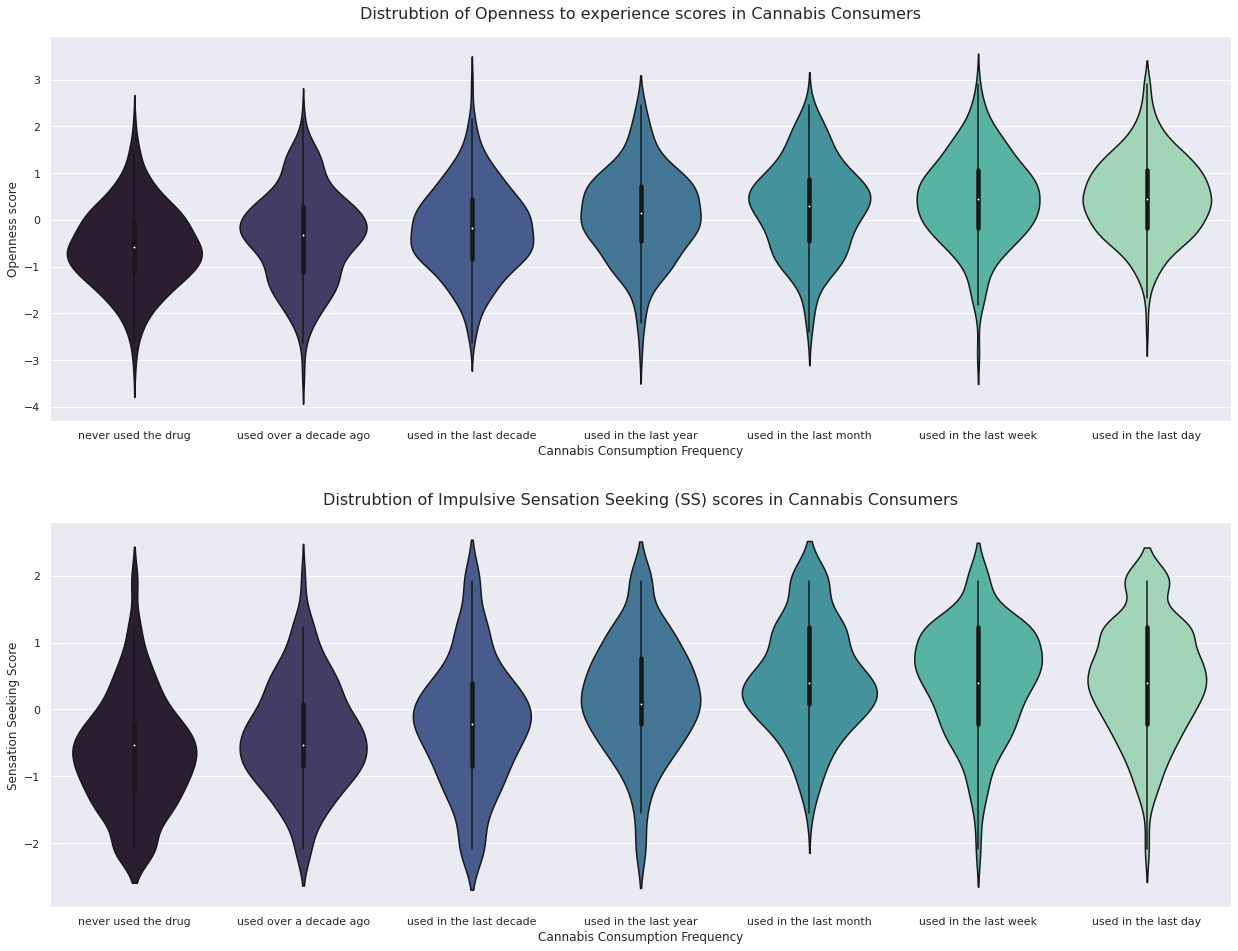

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Cannabis', y='Oscore',  data=illegal_df,palette='mako', ax=ax1)
sns.violinplot(x='Cannabis', y='SS', data=illegal_df,palette='mako', ax=ax2)
ax1.set(xlabel = 'Cannabis Consumption Frequency', ylabel = 'Openness score')
ax2.set(xlabel = 'Cannabis Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of Openness to experience scores in Cannabis Consumers', y=1.03, fontsize=16)   
ax2.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Cannabis Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

### Legalh

Text(0.5, 1.03, 'Age vs Legal Highs')

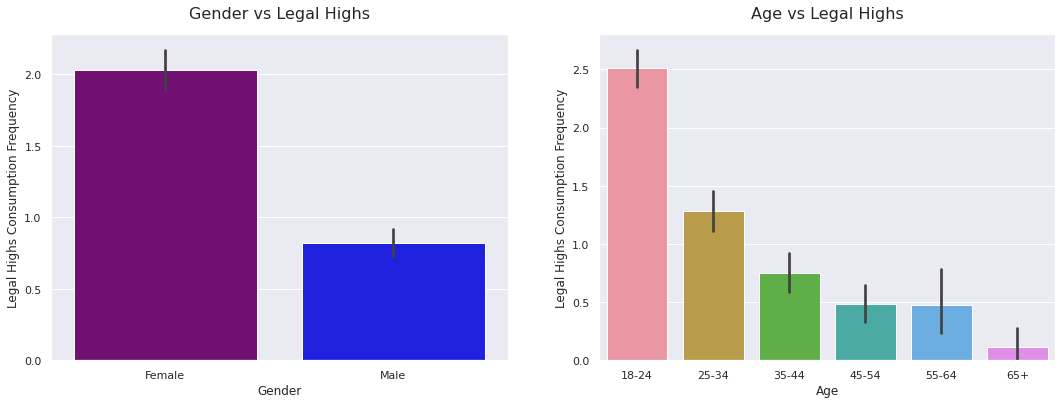

In [ ]:
f,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
genders = ['Female', 'Male']
ages = ['18-24','25-34','35-44','45-54','55-64','65+']
sns.set_style('darkgrid')
custom_palette=['purple','blue']   
sns.set_palette(custom_palette)
sns.barplot(x='Gender', y='Legalh', data=illegal_df, ax=ax1)    
sns.barplot(x='Age',y='Legalh', data=illegal_df, ax=ax2)
ax1.set(xlabel = 'Gender', ylabel = 'Legal Highs Consumption Frequency')   
ax1.set_xticklabels(genders)
ax2.set(xlabel = 'Age', ylabel = 'Legal Highs Consumption Frequency')   
ax2.set_xticklabels(ages)
ax1.set_title('Gender vs Legal Highs', y=1.03, fontsize=16)   
ax2.set_title('Age vs Legal Highs', y=1.03, fontsize=16) 

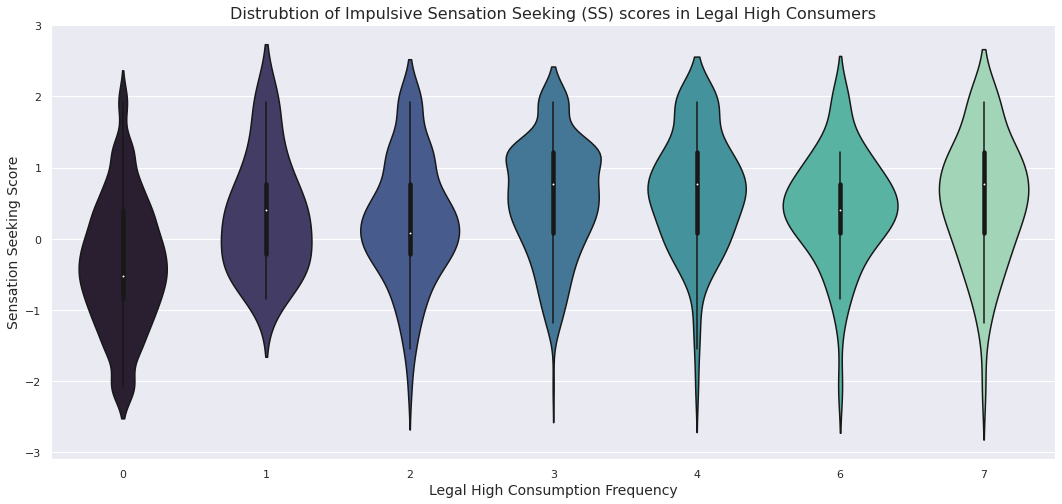

In [ ]:
plt.figure(figsize=(18,8))
sns.violinplot(x='Legalh', y='SS',palette='mako', data=illegal_df)
plt.title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Legal High Consumers', size=16)
plt.xlabel('Legal High Consumption Frequency', size=14)
plt.ylabel('Sensation Seeking Score', size=14)
plt.show()

### Amphet

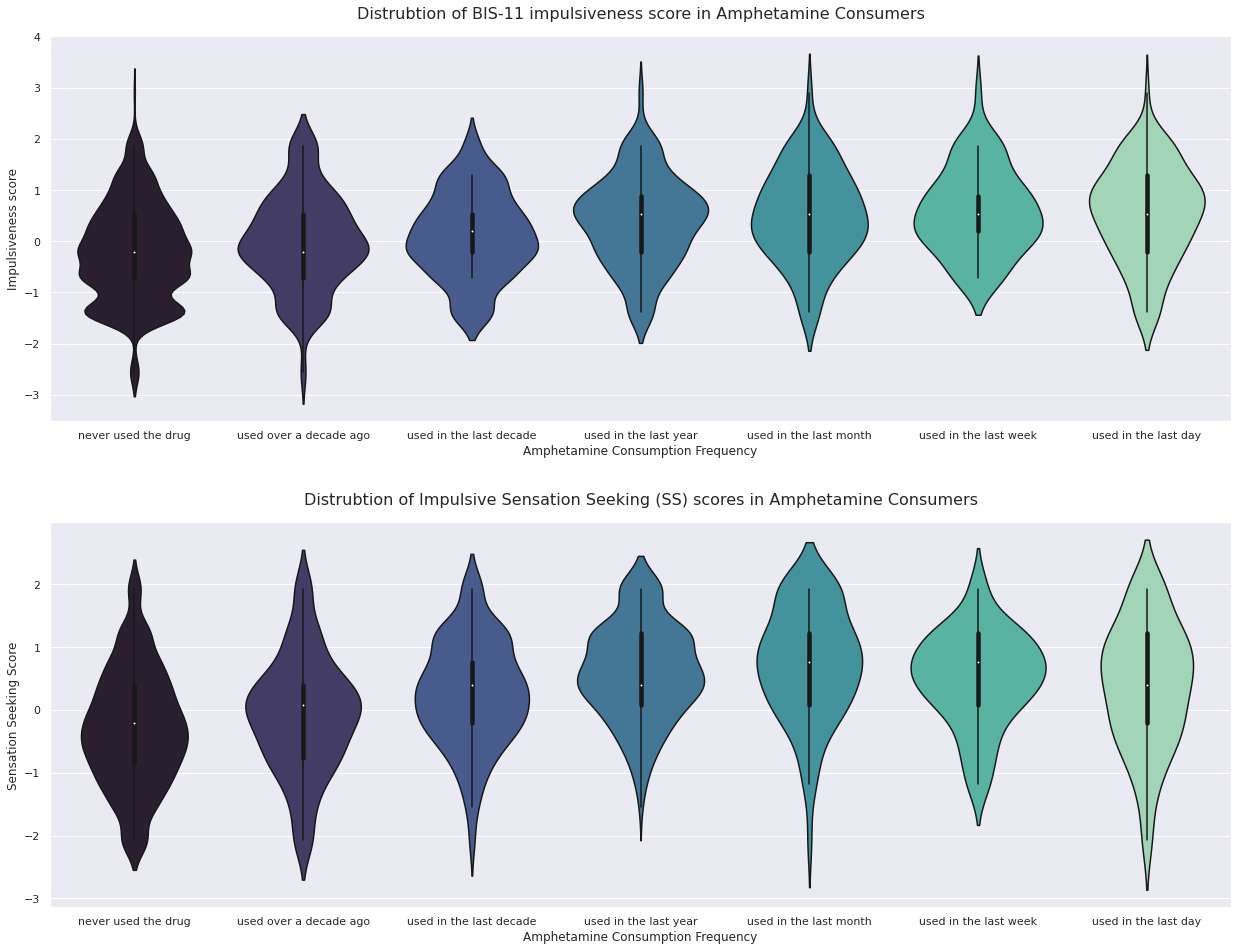

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Amphet', y='Impulsive',  data=illegal_df,palette='mako', ax=ax1)
sns.violinplot(x='Amphet', y='SS', data=illegal_df,palette='mako', ax=ax2)
ax1.set(xlabel = 'Amphetamine Consumption Frequency', ylabel = 'Impulsiveness score')
ax2.set(xlabel = 'Amphetamine Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of BIS-11 impulsiveness score in Amphetamine Consumers', y=1.03, fontsize=16)   
ax2.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Amphetamine Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

### Ecstasy

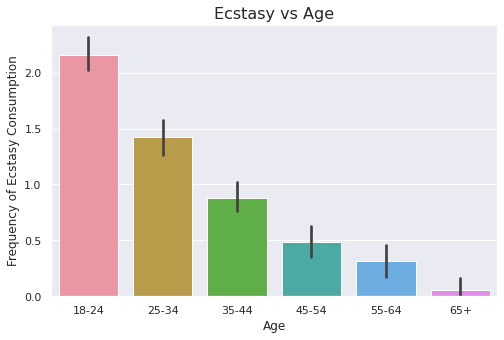

In [ ]:
plt.figure(figsize=(8,5))
ages = ['18-24','25-34','35-44','45-54','55-64','65+']
f=sns.barplot(data=illegal_df, x='Age', y='Ecstasy')
plt.title('Ecstasy vs Age', size=16)
plt.xlabel('Age', size=12)
plt.ylabel('Frequency of Ecstasy Consumption', size=12)
f.set_xticklabels(labels=ages)
plt.show()

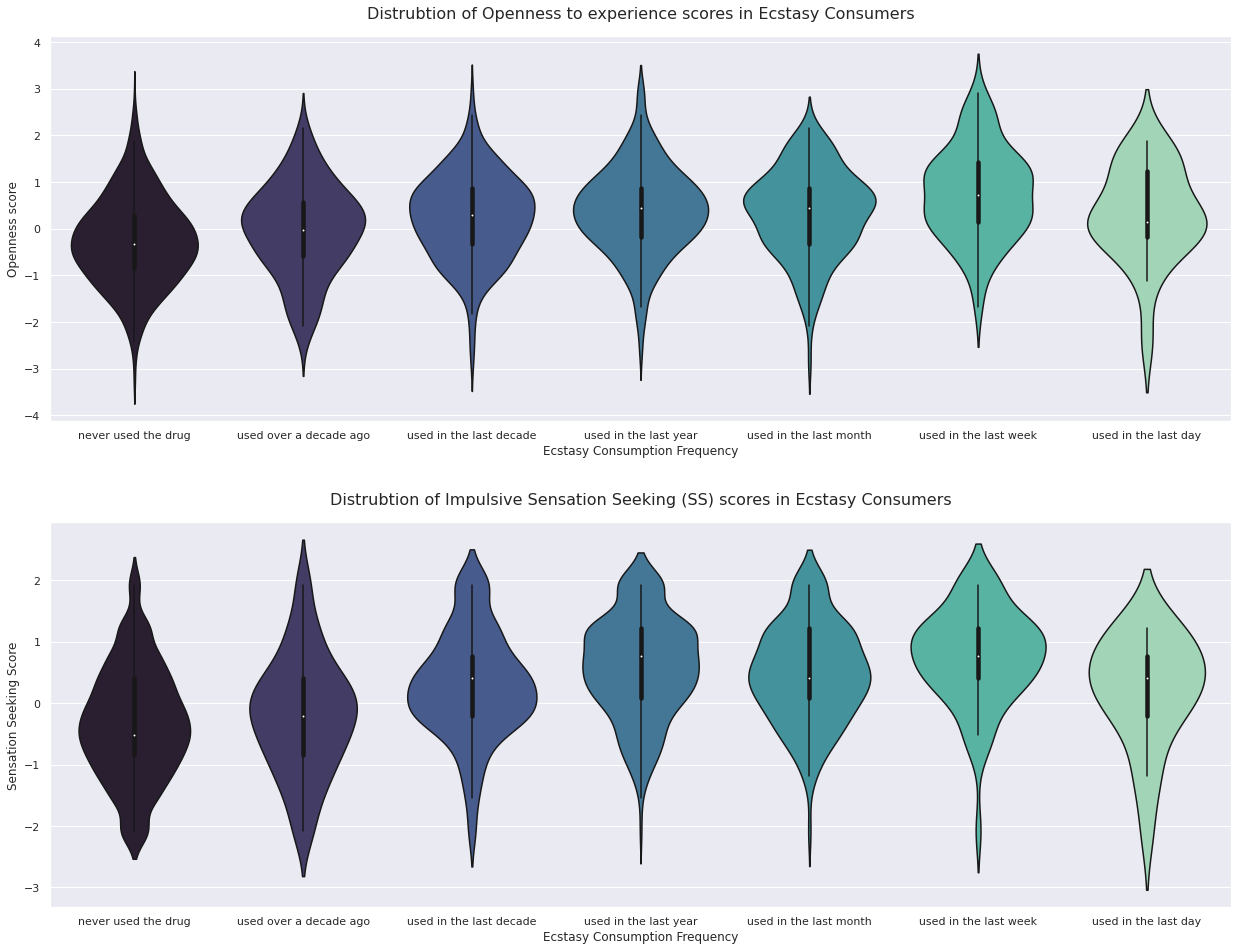

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Ecstasy', y='Oscore',  data=illegal_df,palette='mako', ax=ax1)
sns.violinplot(x='Ecstasy', y='SS', data=illegal_df,palette='mako', ax=ax2)
ax1.set(xlabel = 'Ecstasy Consumption Frequency', ylabel = 'Openness score')
ax2.set(xlabel = 'Ecstasy Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of Openness to experience scores in Ecstasy Consumers', y=1.03, fontsize=16)   
ax2.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Ecstasy Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

### Mushrooms

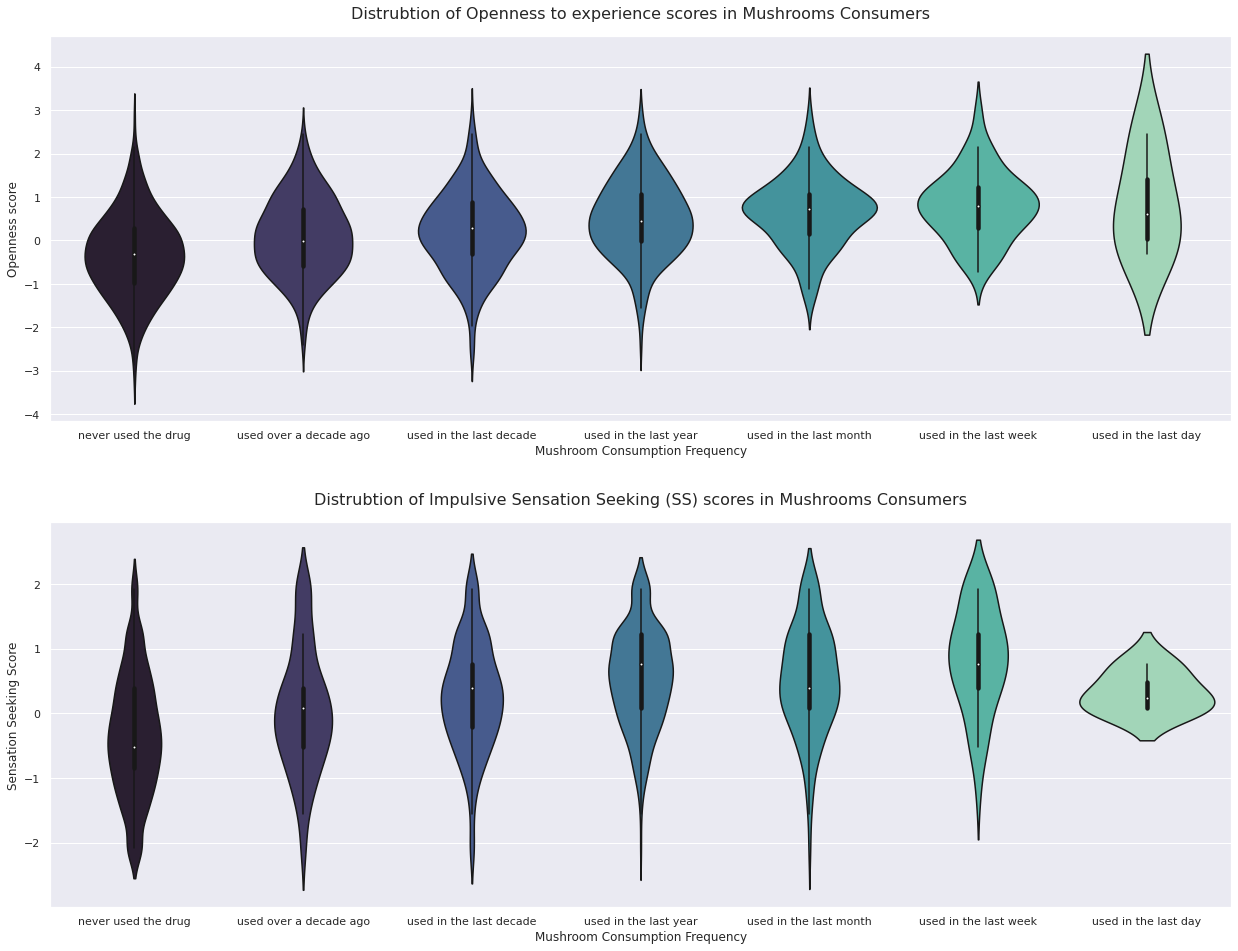

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Mushrooms', y='Oscore',  data=illegal_df,palette='mako', ax=ax1)
sns.violinplot(x='Mushrooms', y='SS', data=illegal_df,palette='mako', ax=ax2)
ax1.set(xlabel = 'Mushroom Consumption Frequency', ylabel = 'Openness score')
ax2.set(xlabel = 'Mushroom Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of Openness to experience scores in Mushrooms Consumers', y=1.03, fontsize=16)   
ax2.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Mushrooms Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

### Coke

[Text(0, 0, 'never used the drug'),
 Text(0, 0, 'used over a decade ago'),
 Text(0, 0, 'used in the last decade'),
 Text(0, 0, 'used in the last year'),
 Text(0, 0, 'used in the last month'),
 Text(0, 0, 'used in the last week'),
 Text(0, 0, 'used in the last day')]

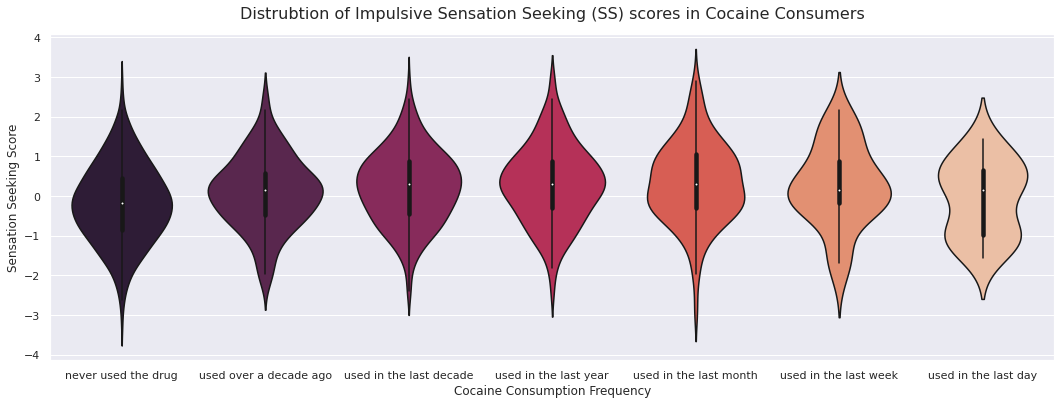

In [ ]:
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Coke', y='Oscore',  data=illegal_df,palette='rocket', ax=ax1)
ax1.set(xlabel = 'Cocaine Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Cocaine Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)

### Conclusion Illegal Drug Use

1. Tant dans le cannabis que dans les high légaux (legalh), les hommes ont consommé la drogue plus fréquemment que les femmes. De plus, la fréquence de consommation de cannabis, de legalh et d'ecstasy était négativement corrélée avec l'âge, de sorte que les individus plus jeunes en consommaient plus fréquemment que les individus plus âgés.

2. Toutes les drogues illégales étaient positivement corrélées avec le SS. Les personnes qui n'ont jamais ou rarement consommé l'une des drogues illégales ont montré des scores SS de -0,5 à -1,0, tandis que les scores des consommateurs fréquents variaient entre 0,5 et 1,5. Cette relation était plus prononcée chez legalh.

3. Le cannabis, l'ecstasy et les champignons ont également montré une corrélation positive avec l'ouverture à l'expérience (Oscore), les scores de la plupart des consommateurs occasionnels et peu fréquents allant de 0 à -0,5 tandis que les consommateurs les plus fréquents avaient des scores compris entre 0,5 et 1,0.


**Pour finir, je voudrais souligner comment, étant donné que les scores SS ont montré la plus grande corrélation avec les drogues, en tant que mesure de la personnalité, il peut s'agir de la mesure la plus robuste pour l'usage et/ou l'abus de drogues. Ce score de personnalité peut nous aider à mieux comprendre les personnes les plus à risque de souffrir de toxicomanie ou de consommation de drogues en général, ce qui peut fournir aux médecins et aux thérapeutes une compréhension plus claire et plus nuancée de cette population de patients.**

# PREDICTION

## SUBJECT 
###**Evaluation of risk to be drug consumer for various drugs**

### Packages,Libraries and Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

data = pd.read_csv('drug_consumption.data', sep=",",header=None)
data=data.rename(columns={0:'ID',1:'Age',2:'Gender',3:'Education',4:'Country',5:'Ethnicity',6:'Nscore',7:'Escore',8:'Oscore',9:'Ascore',10:'Cscore',11:'Impulsive',12:'SS',13:'Alcohol',14:'Amphet',15:'Amyl',16:'Benzos',17:'Caff',18:'Cannabis',19:'Choc',20:'Coke',21:'Crack',22:'Ecstasy',23:'Heroin',24:'Ketamine',25:'Legalh',26:'LSD',27:'Meth',28:'Mushrooms',29:'Nicotine',30:'Semer',31:'VSA'})
data=data.drop(columns=['ID'])
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Dans la description des données, on nous dit que **'Semer'** est un fausse drogue qui sert de contrôle. Puisqu'il ne s'agit pas d'une vraie drogue, ceux qui prétendent avoir utilisé du Semer sont supposés être plus demandeurs. Nous ne pouvons pas être sûrs que ces personnes ont raconté avec précision leur consommation de drogue, par conséquent, nous retirerons ces personnes de la base de données.


In [ ]:
# On enlève les données relative au Semer, n'ayant pas de pertinence dans notre étude
data = data.drop(data[data['Semer'] != 'CL0'].index)

# On va également enlever les colonnes sans utilité dans notre étude
data = data.drop(['Choc','Semer'], axis=1)
data = data.reset_index(drop=True)

In [ ]:
# On encode les string par des valeurs numériques

drugs = ['Alcohol',
         'Amyl',
         'Amphet',
         'Benzos',
         'Caff',
         'Cannabis',
         'Coke',
         'Crack',
         'Ecstasy',
         'Heroin',
         'Ketamine',
         'Legalh',
         'LSD',
         'Meth',
         'Mushrooms',
         'Nicotine',
         'VSA'    ]

def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL4':
        return 5
    elif x == 'CL5':
        return 6
    else:
        return 7

         
for column in drugs:
    data[column] = data[column].apply(drug_encoder)


In [ ]:
# MATRICE DE CORRELATION 

corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)

In [ ]:
# On enlève les colonnes avec les corrélations les plus basses

low_corr = ['Age', 'Gender', 'Education', 'Alcohol','Ascore','Caff']
for column in low_corr:
    data = data.drop(column, axis=1)
data.head()

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084,2,0,2,0,0,0,0,0,0,0,0,0,0,2,0
1,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,0,2,0,2,3,0,4,0
2,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0
3,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084,0,0,3,2,2,0,0,0,2,0,0,0,0,2,0
4,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575,1,1,0,3,0,0,1,0,0,1,0,0,2,2,0


In [ ]:
def preprocessing_inputs(df, column):
    df = df.copy()
    
    # Split df into X and y
    y = df[column]
    X = df.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 80% train et 20% test
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test
    


In [ ]:
# Fonction pour matrice de confusion 

def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])

### Nicotine Consumption Risk Prediction (NCRP)

In [ ]:
# Prediction for Nicotine
# On crée une autre colonne pour indiquer les fumeurs et les non fumeurs (1 et 0)

nic_df = data.copy()
nic_df['Nicotine_User'] = nic_df['Nicotine'].apply(lambda x: 1 if x not in [0,1] else 0)
nic_df = nic_df.drop(['Nicotine'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = preprocessing_inputs(nic_df, 'Nicotine_User')


In [ ]:
#On entraine les différents modèles de prédictions 

models = {
            '     Logisitc Regression': LogisticRegression(),
            '        Ridge Classifier': RidgeClassifier(),
            ' Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


In [ ]:
# Resultats des modèles de prédictions

print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 82.45%
        Ridge Classifier Accuracy: 82.18%
 Support Vector Machines Accuracy: 80.32%
Random Forest Classifier Accuracy: 81.38%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.87109
        Ridge Classifier F1-Score: 0.8694
 Support Vector Machines F1-Score: 0.85769
Random Forest Classifier F1-Score: 0.86989


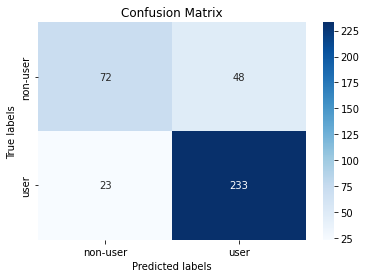

In [ ]:
#Matrice de confusion avec le modèle le plus performant 
model = RandomForestClassifier()  # ici c'est le RFC
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

In [ ]:
# CELLULE LONGUE A TOURNER (2MIN)
#Etude des hyperparamètres à modifier pour une précision optimale 
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),
   X_train, y_train, param_name = "n_estimators", param_range = param_range,
   cv = 4, scoring = "accuracy", n_jobs = -1)


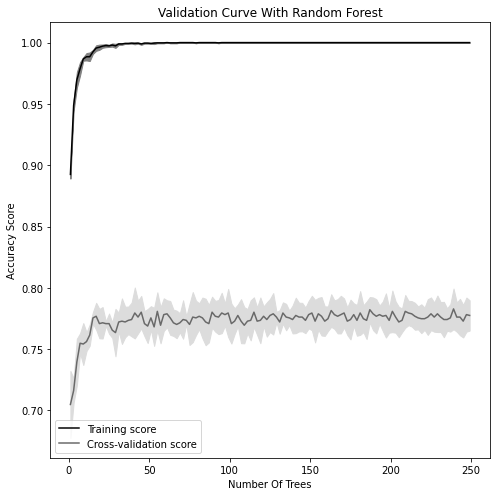

In [ ]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.subplots(1, figsize = (7, 7))
plt.plot(param_range, train_mean, label = "Training score", color = "black")
plt.plot(param_range, test_mean, label = "Cross-validation score", color = "dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color = "gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color = "gainsboro")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc = "best")
plt.show()

### **Methamphetamine Consumption Risk Prediction (MCRP)**

In [ ]:
#On applique le même raisonnement que pour la nicotine
meth_df = data.copy()
meth_df['Meth_User'] = meth_df['Meth'].apply(lambda x: 1 if x not in [0,1] else 0)
meth_df = meth_df.drop(['Meth'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = preprocessing_inputs(meth_df, 'Meth_User')
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

In [ ]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

In [ ]:
model = LogisticRegression() #Meilleur modèle
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

### **Mushrooms Consumption Risk Predictions**

In [ ]:
mushrooms_data = data.copy()
mushrooms_data['Mushrooms_User'] = mushrooms_data['Mushrooms'].apply(lambda x: 1 if x not in [0,1] else 0)
mushrooms_data = mushrooms_data.drop(['Mushrooms'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = preprocessing_inputs(mushrooms_data, 'Mushrooms_User')

In [ ]:
#On entraine les différents modèles de prédictions 

models = {
            '     Logisitc Regression': LogisticRegression(),
            '        Ridge Classifier': RidgeClassifier(),
            ' Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


In [ ]:
# Resultats des modèles de prédictions

print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 85.37%
        Ridge Classifier Accuracy: 85.37%
 Support Vector Machines Accuracy: 85.90%
Random Forest Classifier Accuracy: 85.90%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.79853
        Ridge Classifier F1-Score: 0.79554
 Support Vector Machines F1-Score: 0.80866
Random Forest Classifier F1-Score: 0.80866


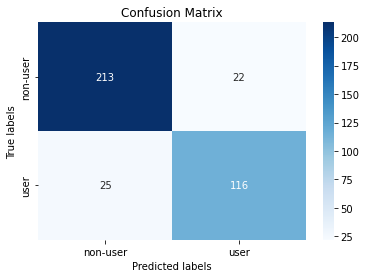

In [ ]:
#Matrice de confusion avec le modèle le plus performant 
model = RandomForestClassifier()  # ici c'est le RFC
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

RandomForestClassifier()

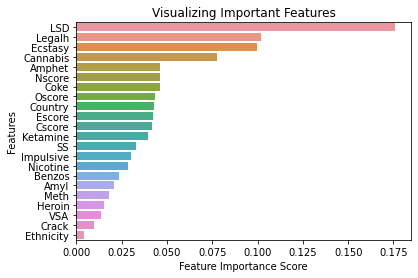

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

###**LSD Consumption Risk Prediction**

In [ ]:
lsd_data = data.copy()
lsd_data['LSD_User'] = lsd_data['LSD'].apply(lambda x: 1 if x not in [0,1] else 0)
lsd_data = lsd_data.drop(['LSD'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = preprocessing_inputs(lsd_data, 'LSD_User')

In [ ]:
#On entraine les différents modèles de prédictions 

models = {
            '     Logisitc Regression': LogisticRegression(),
            '        Ridge Classifier': RidgeClassifier(),
            ' Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


In [ ]:
# Resultats des modèles de prédictions

print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 89.63%
        Ridge Classifier Accuracy: 90.96%
 Support Vector Machines Accuracy: 90.43%
Random Forest Classifier Accuracy: 88.83%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.8186
        Ridge Classifier F1-Score: 0.83962
 Support Vector Machines F1-Score: 0.84071
Random Forest Classifier F1-Score: 0.81416


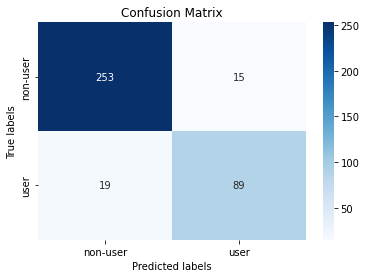

In [ ]:
#Matrice de confusion avec le modèle le plus performant 
model = RidgeClassifier()  # ici c'est le RC
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

Overall we see that our Logistic Regression, Random Forest Classifiers, and SVM's performed the best. The models performed best when classifying Cocaine and Nicotine. 

On voit au final que la méthode de régression logistique, la Random Forest Classifiers et le SVM 